In [2]:
# Data Handling and Visualization
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Text Preprocessing
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from bs4 import BeautifulSoup 

# Building Model
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences


[nltk_data] Downloading package stopwords to /aiffel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 2.3.  (1) Viz for sentence length

In [3]:
# Data Check
data = pd.read_csv("newssum_processed_text.csv", index_col=[0])
data.head()


,headlines,text
0,upgrad learner switches to career in ml al wit...,saurav kant alumnus upgrad iiit pg program mac...
1,delhi techie wins free food from swiggy for on...,kunal shah credit card bill payment platform c...
2,new zealand end rohit sharma led india match w...,new zealand defeated india wickets fourth odi ...
3,aegon life iterm insurance plan helps customer...,aegon life iterm insurance plan customers enjo...
4,have known hirani for yrs what if metoo claims...,speaking sexual harassment allegations rajkuma...


In [5]:
# Text Lengths
text_len = [len(s.split()) for s in data['text']]
headlines_len = [len(s.split()) for s in data['headlines']]

print('텍스트의 최소 길이 : {}'.format(np.min(text_len)))
print('텍스트의 최대 길이 : {}'.format(np.max(text_len)))
print('텍스트의 평균 길이 : {}'.format(np.mean(text_len)))
print('요약의 최소 길이 : {}'.format(np.min(headlines_len)))
print('요약의 최대 길이 : {}'.format(np.max(headlines_len)))
print('요약의 평균 길이 : {}'.format(np.mean(headlines_len)))


텍스트의 최소 길이 : 1
텍스트의 최대 길이 : 60
텍스트의 평균 길이 : 35.09773427255817
요약의 최소 길이 : 1
요약의 최대 길이 : 16
요약의 평균 길이 : 9.299606623364742


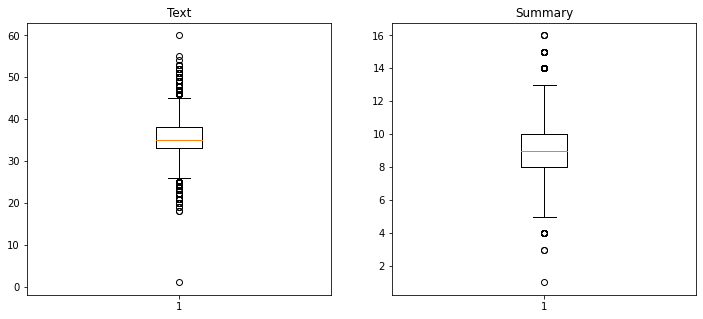

In [14]:
plt.figure(figsize=(12,5))

# boxplot - text length
plt.subplot(1,2,1)
plt.boxplot(text_len)
plt.title('Text')

# boxplot - headline length
plt.subplot(1,2,2)
plt.boxplot(headlines_len)
plt.title('Summary')

plt.show()


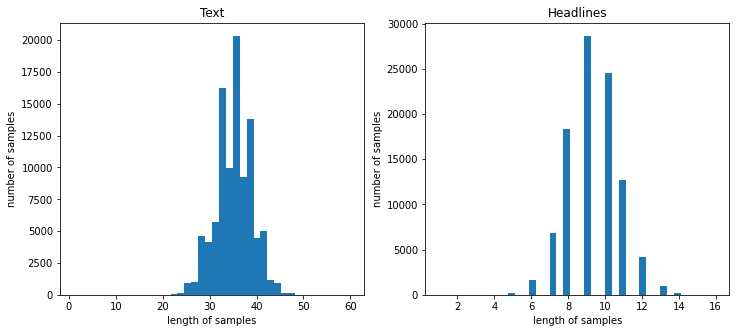

In [13]:
plt.figure(figsize=(12,5))

# histogram - text length
plt.subplot(1,2,1)
plt.hist(text_len, bins = 40)
plt.title('Text')
plt.xlabel('length of samples')
plt.ylabel('number of samples')

# histogram - headlines length
plt.subplot(1,2,2)
plt.hist(headlines_len, bins = 40)
plt.title('Headlines')
plt.xlabel('length of samples')
plt.ylabel('number of samples')

plt.show()

### 2.3.  (2) Portion over threshold

In [16]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s.split()) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, round(cnt / len(nested_list),5)*100))

threshold_text = 45
threshold_headline = 11

below_threshold_len(threshold_text, data['text'])
below_threshold_len(threshold_headline, data['headlines'])


전체 샘플 중 길이가 45 이하인 샘플의 비율: 99.678
전체 샘플 중 길이가 11 이하인 샘플의 비율: 94.498


### 2.5. Integer Encoding (1) Drop sentences

Drop sentences whose length is 1

In [ ]:
# Pick sentences to drop ()
drop_train = [index for index, sentence in enumerate(decoder_input_train) if len(sentence) == 1]
drop_test = [index for index, sentence in enumerate(decoder_input_test) if len(sentence) == 1]

print('삭제할 훈련 데이터의 개수 :', len(drop_train))
print('삭제할 테스트 데이터의 개수 :', len(drop_test))

encoder_input_train = [sentence for index, sentence in enumerate(encoder_input_train) if index not in drop_train]
decoder_input_train = [sentence for index, sentence in enumerate(decoder_input_train) if index not in drop_train]
decoder_target_train = [sentence for index, sentence in enumerate(decoder_target_train) if index not in drop_train]

encoder_input_test = [sentence for index, sentence in enumerate(encoder_input_test) if index not in drop_test]
decoder_input_test = [sentence for index, sentence in enumerate(decoder_input_test) if index not in drop_test]
decoder_target_test = [sentence for index, sentence in enumerate(decoder_target_test) if index not in drop_test]

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :', len(decoder_input_train))
print('테스트 데이터의 개수 :', len(encoder_input_test))
print('테스트 레이블의 개수 :', len(decoder_input_test))
